# Aaron Kohn
## Final Project; Milestone 4

In [2]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ssl
import re
import json
import os

In [3]:
# Import data from api. Set limit at 10000 to get complete dataset.
schoolurl = 'https://data.cityofnewyork.us/resource/s52a-8aq6.json?$limit=10000'
response = requests.get(schoolurl, verify= False) # verify= False to avoid ssl certificate errors

C:\Users\aarme\anaconda3.2\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.cityofnewyork.us'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [4]:
response # Check response

<Response [200]>

In [5]:
# Load data into dataframe view first few rows
enrollment_df = pd.DataFrame(response.json())
enrollment_df.head()

,dbn,school_name,year,total_enrollment,grade_pk_half_day_full_day,grade_k,grade_1,grade_2,grade_3,grade_4,...,multiple_race_categories_not_represented_2,white_1,white_2,students_with_disabilities_1,students_with_disabilities_2,english_language_learners_1,english_language_learners_2,poverty_1,poverty_2,economic_need_index
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,1.1,3,1.6,65,34.2,19,10.0,171,90.0,No Data
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,0.5,2,1.1,64,35.0,17,9.3,169,92.3,93.5%
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,1.7,2,1.1,60,34.1,16,9.1,149,84.7,89.6%
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.2%
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.0%


In [6]:
# Check column names
enrollment_df.columns

Index(['dbn', 'school_name', 'year', 'total_enrollment',
       'grade_pk_half_day_full_day', 'grade_k', 'grade_1', 'grade_2',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'female_1', 'female_2',
       'male_1', 'male_2', 'asian_1', 'asian_2', 'black_1', 'black_2',
       'hispanic_1', 'hispanic_2',
       'multiple_race_categories_not_represented_1',
       'multiple_race_categories_not_represented_2', 'white_1', 'white_2',
       'students_with_disabilities_1', 'students_with_disabilities_2',
       'english_language_learners_1', 'english_language_learners_2',
       'poverty_1', 'poverty_2', 'economic_need_index'],
      dtype='object')

In [7]:
# Replace column names
columns = enrollment_df.columns[18:] # Create list of columns for replacement
new_cols = [col.replace('1', '#').replace('2', '%') for col in enrollment_df.columns[18:]] # Create list of new column names
cols_dict = {columns[i]:new_cols[i] for i in range(len(columns))} # Join old and new column names into a dict
enrollment_df.rename(columns=cols_dict, inplace= True) # Rename columns
enrollment_df.rename(columns={'grade_pk_half_day_full_day':'grade_pk_all'}, inplace= True) # Replace with shorter column name
enrollment_df.head()

,dbn,school_name,year,total_enrollment,grade_pk_all,grade_k,grade_1,grade_2,grade_3,grade_4,...,multiple_race_categories_not_represented_%,white_#,white_%,students_with_disabilities_#,students_with_disabilities_%,english_language_learners_#,english_language_learners_%,poverty_#,poverty_%,economic_need_index
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,...,1.1,3,1.6,65,34.2,19,10.0,171,90.0,No Data
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,0.5,2,1.1,64,35.0,17,9.3,169,92.3,93.5%
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,1.7,2,1.1,60,34.1,16,9.1,149,84.7,89.6%
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.2%
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.0%


In [8]:
# Strip white space from all columns
for col in enrollment_df.columns:
    enrollment_df[col] = enrollment_df[col].apply(lambda x : x.strip())
#     enrollment_df[col] = enrollment_df[col].apply(lambda x : x.strip(''))

In [9]:
# Split dbn column into district borough and school number
enrollment_df['d_b_n'] = [re.split('(\d+)',s) for s in enrollment_df['dbn']] # Split on district number, Borough initial and school number
# Add into new columns
enrollment_df['district'] = enrollment_df['d_b_n'].apply(lambda x : x[1]) 
enrollment_df['borough'] = enrollment_df['d_b_n'].apply(lambda x : x[2])
enrollment_df['school_num'] = enrollment_df['d_b_n'].apply(lambda x : x[3])
enrollment_df.drop('d_b_n', axis= 1, inplace= True) # Drop temporary column

In [10]:
enrollment_df.tail()

,dbn,school_name,year,total_enrollment,grade_pk_all,grade_k,grade_1,grade_2,grade_3,grade_4,...,students_with_disabilities_#,students_with_disabilities_%,english_language_learners_#,english_language_learners_%,poverty_#,poverty_%,economic_need_index,district,borough,school_num
8967,84X730,Bronx Charter School for the Arts,2013-14,319,0,52,54,56,56,53,...,57,17.9,27,8.5,222,69.6,No Data,84,X,730
8968,84X730,Bronx Charter School for the Arts,2014-15,316,0,53,55,56,53,47,...,53,16.8,34,10.8,284,89.9,82.2%,84,X,730
8969,84X730,Bronx Charter School for the Arts,2015-16,323,0,51,57,55,55,57,...,61,18.9,49,15.2,268,83.0,80.6%,84,X,730
8970,84X730,Bronx Charter School for the Arts,2016-17,320,0,53,53,55,52,53,...,67,20.9,51,15.9,235,73.4,83.5%,84,X,730
8971,84X730,Bronx Charter School for the Arts,2017-18,314,0,50,51,54,51,52,...,63,20.1,57,18.2,253,80.6,88.3%,84,X,730


In [11]:
enrollment_df['borough'].unique()

array(['M', 'X', 'K', 'Q', 'R'], dtype=object)

In [10]:
# Check for duplicate rows
enrollment_df.duplicated().sum()

0

In [11]:
# Remove '%' from column values to be able to cast as numeric
enrollment_df['economic_need_index'] = enrollment_df['economic_need_index'].apply(lambda x : x.strip('%'))

In [12]:
enrollment_df.iloc[:,3:-3] = enrollment_df.iloc[:,3:-3].apply(pd.to_numeric, errors='coerce') # Convert columns to numeric
enrollment_df = enrollment_df.convert_dtypes(convert_string= False) # Force conversion to numeric types (String type to remain as object) 

In [13]:
# Describe data
enrollment_df.describe()

,total_enrollment,grade_pk_all,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,...,multiple_race_categories_not_represented_%,white_#,white_%,students_with_disabilities_#,students_with_disabilities_%,english_language_learners_#,english_language_learners_%,poverty_#,poverty_%,economic_need_index
count,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,8972.000000,...,8972.000000,8972.000000,8972.000000,8972.000000,8972.00000,8972.000000,8972.000000,8972.000000,8972.000000,7242.000000
mean,598.226148,15.635533,46.608671,48.398128,47.649131,46.430227,45.044026,43.910945,42.599643,41.859563,...,2.129848,87.473027,11.942142,117.765047,22.03765,81.541016,13.407769,435.558627,75.196790,67.500469
std,485.684603,36.119885,54.561859,57.195199,57.255600,57.788614,57.712646,56.348207,87.889778,89.773353,...,2.480443,186.636443,18.287075,94.887663,15.90465,114.532540,14.227278,346.397968,19.584137,20.246450
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.900000,3.400000
25%,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.700000,5.000000,1.200000,62.000000,14.90000,17.000000,4.100000,229.000000,67.600000,56.000000
50%,484.000000,0.000000,34.000000,35.000000,31.500000,24.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,14.000000,2.900000,95.000000,19.40000,42.000000,9.200000,356.000000,80.100000,72.300000
75%,704.000000,31.000000,83.000000,86.000000,86.000000,84.000000,81.000000,80.000000,63.000000,60.000000,...,2.600000,76.000000,13.900000,144.000000,24.50000,99.000000,17.800000,528.000000,89.300000,82.800000
max,5838.000000,1158.000000,406.000000,383.000000,349.000000,373.000000,376.000000,351.000000,771.000000,796.000000,...,31.200000,3230.000000,93.300000,925.000000,100.00000,1219.000000,100.000000,3589.000000,100.000000,99.600000


In [14]:
# Summarize statistics
enrollment_df.describe(include= 'O')

,dbn,school_name,year,district,borough,school_num
count,8972,8972,8972,8972,8972,8972
unique,1844,1834,5,35,5,748
top,09X327,New Visions Charter High School for Advanced Math,2017-18,84,K,008
freq,5,18,1844,1007,2798,25


In [15]:
# Check for missing data
enrollment_df.isna().sum()

dbn                                              0
school_name                                      0
year                                             0
total_enrollment                                 0
grade_pk_all                                     0
grade_k                                          0
grade_1                                          0
grade_2                                          0
grade_3                                          0
grade_4                                          0
grade_5                                          0
grade_6                                          0
grade_7                                          0
grade_8                                          0
grade_9                                          0
grade_10                                         0
grade_11                                         0
grade_12                                         0
female_#                                         0
female_%                       

In [16]:
enrollment_df['economic_need_index'] # Missing 2013-2014 data

0       <NA>
1       93.5
2       89.6
3       89.2
4       89.0
        ... 
8967    <NA>
8968    82.2
8969    80.6
8970    83.5
8971    88.3
Name: economic_need_index, Length: 8972, dtype: Float64

In [17]:
enrollment_df['economic_need_index'].fillna(method= 'bfill', inplace= True) # Back fill all values with next years data 

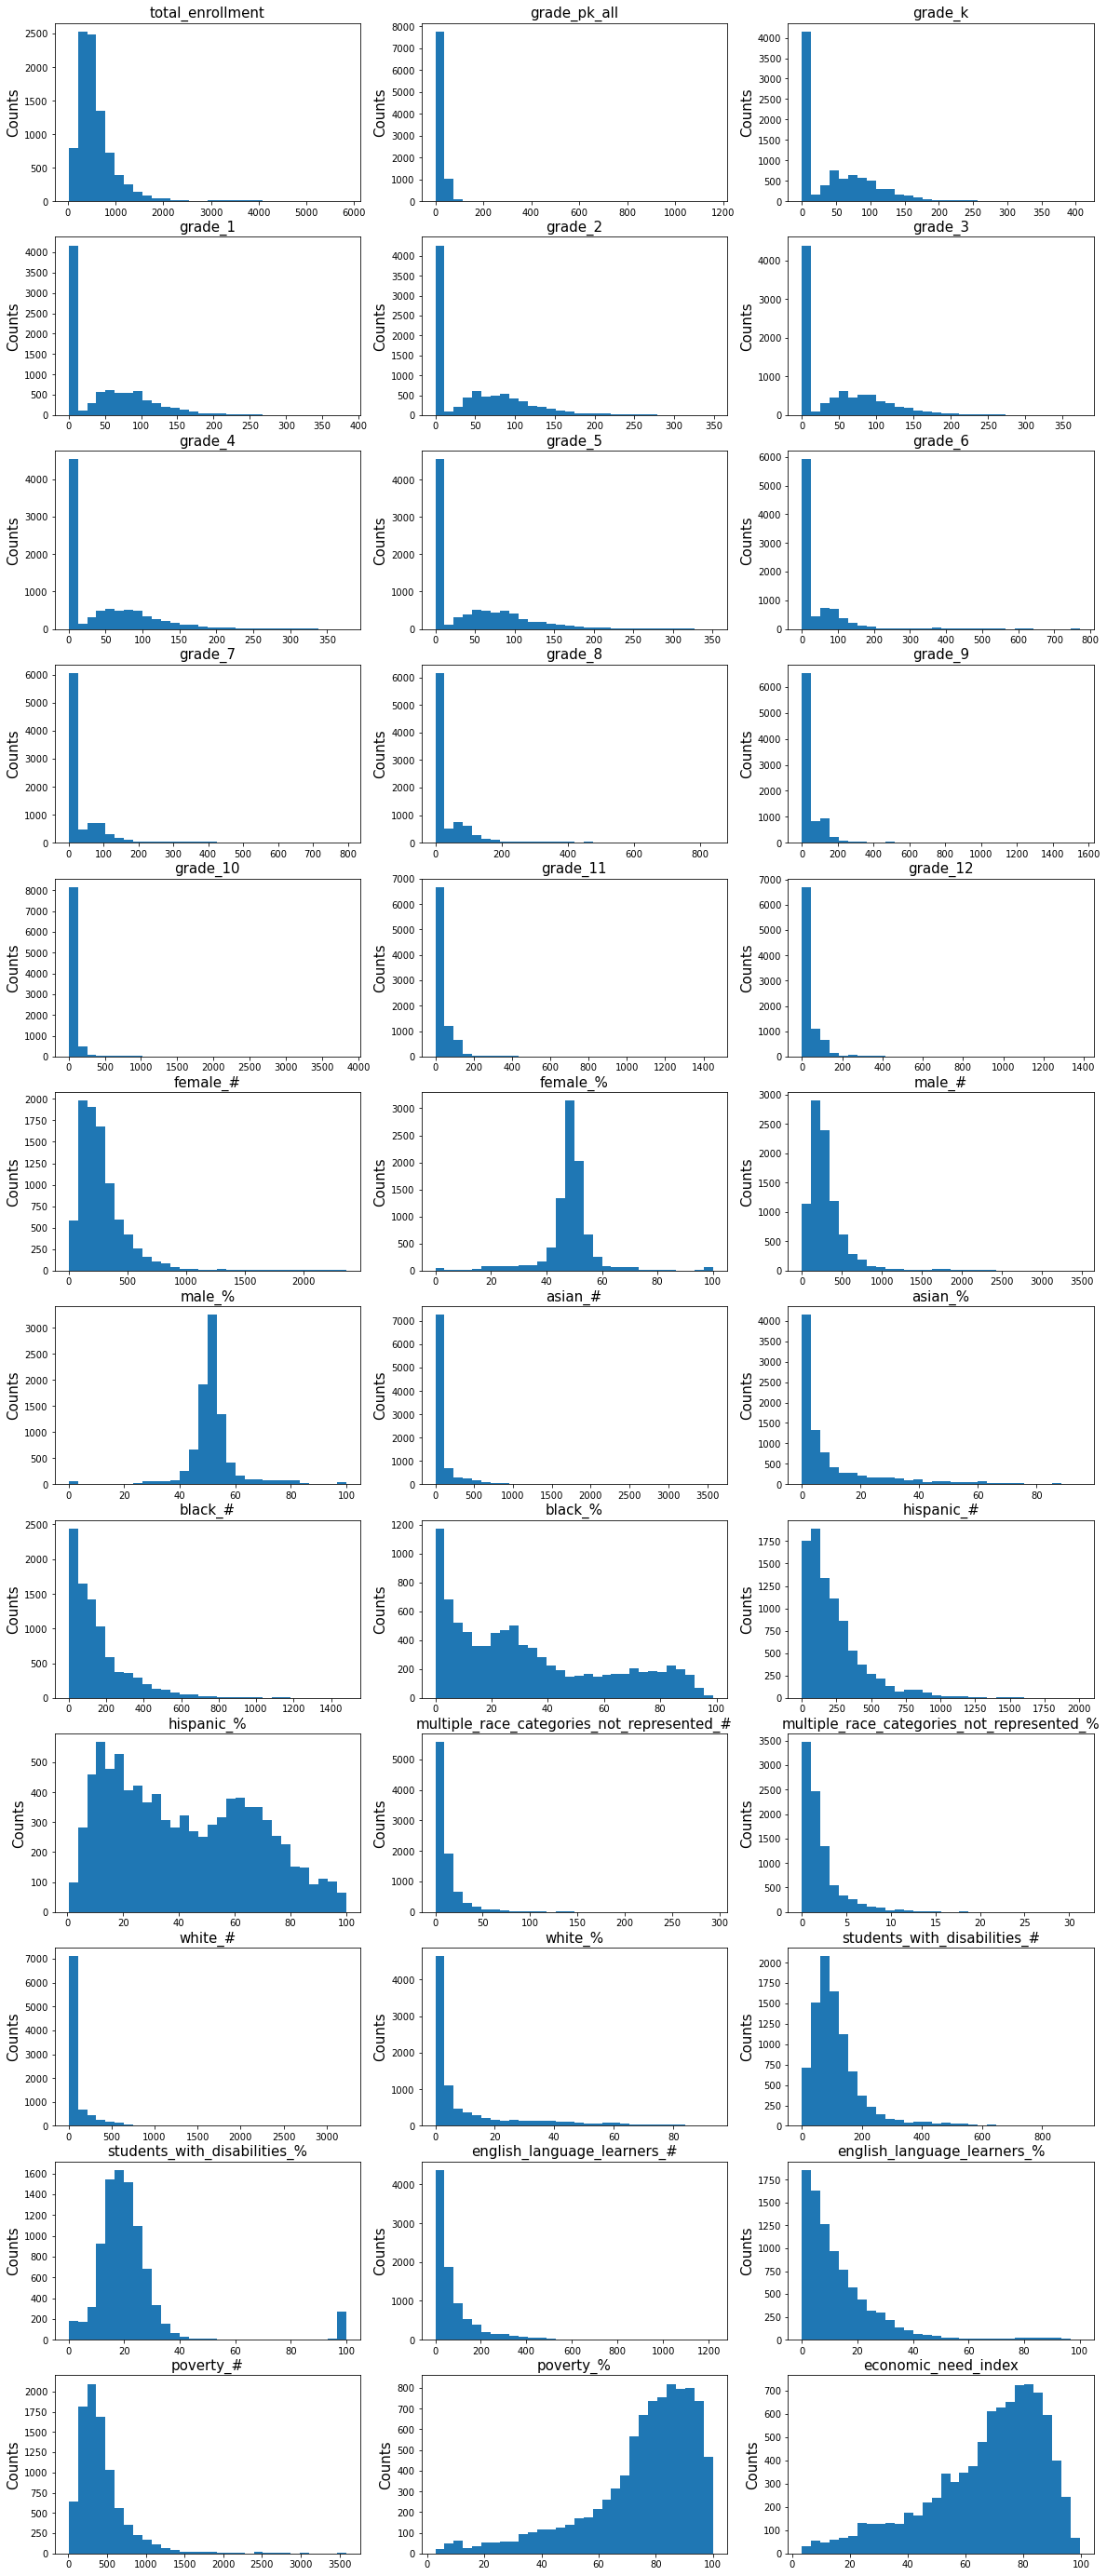

In [18]:
# Use histograms to look for outliers
plt.rcParams['figure.figsize'] = (20, 50) # Set size

# make subplots
fig, axes = plt.subplots(nrows = 12, ncols = 3)

# Specify the features of interest
num_features = ['total_enrollment', 'grade_pk_all',
       'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'female_#', 'female_%', 'male_#', 'male_%', 'asian_#',
       'asian_%', 'black_#', 'black_%', 'hispanic_#', 'hispanic_%',
       'multiple_race_categories_not_represented_#',
       'multiple_race_categories_not_represented_%', 'white_#', 'white_%',
       'students_with_disabilities_#', 'students_with_disabilities_%',
       'english_language_learners_#', 'english_language_learners_%',
       'poverty_#', 'poverty_%', 'economic_need_index']
xaxes = num_features # x-axes labels
yaxes = ['Counts']*36 # y-axes labels

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    try:
        ax.hist(enrollment_df[num_features[idx]].dropna(), bins= 30)
        ax.set_title(xaxes[idx], fontsize=15)
        ax.set_ylabel(yaxes[idx], fontsize=15)
        ax.tick_params(axis='both', labelsize=10)

    except IndexError:
        pass

In [19]:
enrollment_df['asian_#'].sort_values()[-15:] # Check top 15 cases

6107    2137
6108    2236
6109    2322
575     2409
576     2417
577     2443
579     2451
578     2507
6110    2513
6111    2575
3421    3299
3420    3304
3422    3340
3423    3483
3424    3576
Name: asian_#, dtype: Int64

In [20]:
enrollment_df[['grade_9','grade_10', 'grade_11']].describe() # Compare stats for three grades note max values

,grade_9,grade_10,grade_11
count,8972.000000,8972.000000,8972.000000
mean,50.853879,49.713553,39.446946
std,135.137015,151.644252,108.051316
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,69.000000,70.000000,52.000000
max,1551.000000,3832.000000,1450.000000


In [21]:
enrollment_df['grade_10'].sort_values()[-10:] # Check top 10 values

4865    1401
3420    1413
4866    1445
3423    1492
3424    1556
7956    3330
7959    3525
7957    3545
7955    3660
7958    3832
Name: grade_10, dtype: Int64

In [22]:
enrollment_df['grade_9'].sort_values()[-10:] # Check top 10 values

5933    1279
4867    1291
4865    1338
4868    1341
4864    1350
3421    1363
3420    1375
3422    1457
3424    1521
3423    1551
Name: grade_9, dtype: Int64

In [23]:
enrollment_df.iloc[7955:7960,0:21 ] # view full data for top 5 observations

,dbn,school_name,year,total_enrollment,grade_pk_all,grade_k,grade_1,grade_2,grade_3,grade_4,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,female_#,female_%,male_#
7955,79Q950,Pathways to Graduation,2013-14,3674,0,0,0,0,0,0,...,0,0,0,7,3660,2,5,1600,43.5,2074
7956,79Q950,Pathways to Graduation,2014-15,3344,0,0,0,0,0,0,...,0,0,0,0,3330,1,13,1406,42.0,1938
7957,79Q950,Pathways to Graduation,2015-16,3590,0,0,0,0,0,0,...,0,0,0,2,3545,5,38,1485,41.4,2105
7958,79Q950,Pathways to Graduation,2016-17,3836,0,0,0,0,0,0,...,0,0,0,0,3832,3,1,1600,41.7,2236
7959,79Q950,Pathways to Graduation,2017-18,3528,0,0,0,0,0,0,...,0,0,0,0,3525,0,3,1504,42.6,2024


These schools will most likely not be present in the final dataset. The final set is to contain public schools only. I believe for now it is best not to drop cases that appear correct although they may be outliers untill after the final merge.

In [24]:
enrollment_df.to_csv('enrollment.csv')